<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2019-2020/Pr%C3%A1cticas/Pr%C3%A1ctica3_M%C3%A9todo_Transformaci%C3%B3n_Solucions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 3: Transformación de una distribución**

<hr>

**Objectivo de la práctica** 

Usar el método de transformación para transformar números aleatorios entre [0,1] para que sigan una distribución determinada

En particular, en esta práctica vamos a generar números aleatórios que sigan una distribución que tiene esta forma, entre $0$ y $\pi$:

$$
  f(x) = \frac{1}{2} sin(x)
$$

El factor 2 sale de la integral analítica de $sin(x)$, así nos queda bien normalizada $f(x)$, es decir que su integral entre 0 y $\pi$ es 1:

$$
    \int^\pi_0 sin(x)dx = \left . -\cos (x) \right|^\pi_0 = 2
$$

La función cumulativa es la integral de $f(x)$, que si lo dejamos en función de $x$ nos queda de forma analítica:

$$
    F(x) = \int^x_0 f(x')dx' = \frac{1}{2}\int^x_0 sin(x')dx' = \frac{1}{2}(\left . -\cos x' \right|^x_0) = \frac{1}{2}(1 - cos(x))
$$
<hr>

### <font color='orange'>**> Python #1**</font>

Vamos primero a hacer las gráficas de f(x) y F(x):

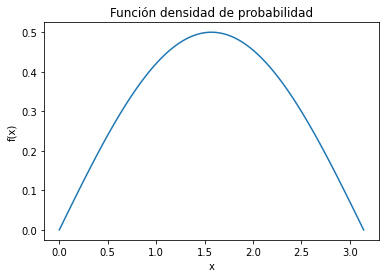

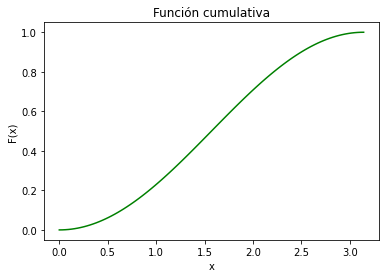

In [29]:
# Importa las librerias numpy y matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 0.5 * np.sin(x) # función que usaremos para evaluar f(x) o bien usando def
Fcum = lambda x: 0.5 - 0.5*np.cos(x) # función que usaremos para evaluar F(x) o bien usando def

# También se pueden definir las funciones de la manera estandard usando def.
# Aunque la función lambda es más rápida... se haría así:

#def f(x):
#  0.5 * np.sin(x)
#def Fcum(x):
#  0.5 - 0.5*np.cos(x) 

x = np.linspace(0.0, np.pi, 100) # Array de puntos en x para evaluar f(x) y F(x) entre 0 y pi

plt.plot(x,f(x),'-')
plt.title("Función densidad de probabilidad")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

plt.plot(x,Fcum(x),'g-')
plt.title("Función cumulativa")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### <font color='orange'>**> Python #2**</font>

Para usar el método de transformación. Sea $u = F(x)$, si invertimos F(x), obtenemos:

$$
  x = arccos(1 - 2u)
$$

Si $u$ está uniformemente distribuida entre 0 y 1, entonces $x$ estará distribuida de acuerdo con $f(x)$ entre 0 y $\pi$. 

Vamos primero a crear una distribución uniforme entre 0 y 1, generando 100000 números aleatorios:

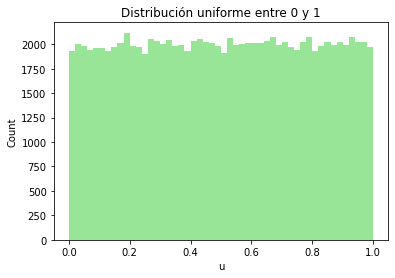

In [30]:
# creamos una distribución de N números entre 0 y 1 distribuidos de forma uniforme:

N = 100000 # Número de puntos a generar

xunif = np.random.uniform(0,1,N) # Generamos números entre 0 y 1 que siguen una dist. uniforme

# Vamos a ver que es una distribución uniforme:

plt.hist(xunif, bins=50, color="limegreen", alpha=.5)
plt.title("Distribución uniforme entre 0 y 1")
plt.xlabel("u")
plt.ylabel("Count")
plt.show()
plt.show()

### <font color='darkgreen'>**> Ejercicio #1**</font>

<hr>

<font color='green'>Esta práctica de 1h no tiene entrega, pero se tiene que realizar este ejercicio de programación durante la clase.</font>

<hr>

Ahora vamos a usar la transformación para ver que somos capaces de hacer que estos números se adapten a f(x):

*   Define una función que usarás para hacer la transformación
*   Usa el array en x distribuido de forma uniforme, y lo convertimos en otro array transformado con esa función
*   Dibuja un histograma de estos x's transformados

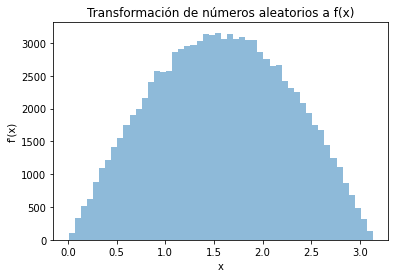

In [31]:
#ft = lambda x: np.arccos(1 - 2*x) # función que usaremos para la transformación, si usamos lambda

def ft(x): # función transf. usando def
  return np.arccos(1. - 2.*x)

xt = ft(xunif) # Aquí cogemos el array xunif, y lo convertimos en otro array transformado

plt.hist(xt, bins=50, alpha=0.5) # voilà!
plt.title("Transformación de números aleatorios a f(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.show()

### <font color='orange'>**> Python #3**</font>

Si queremos comparar con la f(x), tenemos que normalizar este histograma, es decir que el área del histograma sea 1. Hay una opción para normalizar el histograma (density=True como opción en plt.hist):

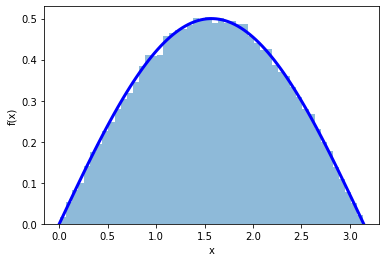

In [32]:
plt.hist(xt, bins=50, density=True, alpha=0.5) # voilà! ahora está normalizado el histograma y podemos comparar con f(x)
plt.plot(x,f(x), "b-", lw=3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Vamos a calcular el área del histograma no normalizado y normalizado para ver que en efecto realiza el que conviene. 

Esto se hace 'capturando' el retorno de la función hist. El valor de retorno es una tupla (n, bins, parches), donde n es un array con los contenidos por cada bin, bins es un array de los límites inferiores de cada bin, y patches son objetos que identifican cada bin (cada rectangulo). Sobre patches podemos cambiar atributos. 

Vamos a verlo en acción:

n: [ 109.  335.  511.  629.  886. 1097. 1222. 1413. 1546. 1748. 1902. 2002.
 2170. 2414. 2567. 2555. 2574. 2869. 2903. 2962. 2972. 3031. 3131. 3129.
 3158. 3064. 3142. 3059. 3100. 3044. 3054. 2867. 2760. 2647. 2664. 2420.
 2322. 2259. 2083. 1938. 1754. 1682. 1446. 1252. 1112.  864.  687.  488.
  322.  135.]
--------------------------------------------------
bins: [0.00662841 0.06921652 0.13180463 0.19439274 0.25698085 0.31956896
 0.38215707 0.44474518 0.50733329 0.5699214  0.63250951 0.69509762
 0.75768573 0.82027384 0.88286195 0.94545006 1.00803817 1.07062628
 1.13321439 1.1958025  1.25839061 1.32097872 1.38356683 1.44615493
 1.50874304 1.57133115 1.63391926 1.69650737 1.75909548 1.82168359
 1.8842717  1.94685981 2.00944792 2.07203603 2.13462414 2.19721225
 2.25980036 2.32238847 2.38497658 2.44756469 2.5101528  2.57274091
 2.63532902 2.69791713 2.76050524 2.82309335 2.88568146 2.94826957
 3.01085767 3.07344578 3.13603389]
--------------------------------------------------
patches: <a 

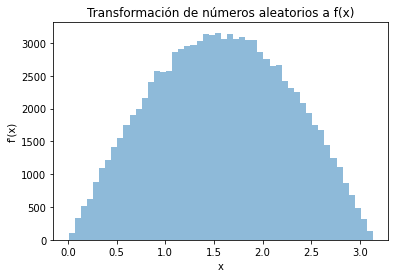

In [33]:
# Histograma _no_ normalizado:

n, bins, patches = plt.hist(xt, bins=50, alpha=0.5) # Capturamos los retornos de hist

print("n:", n) # Esto nos da el valor de cada bin, es decir el valor sobre el eje y. 50 numeros
print("-"*50)
print("bins:", bins) # Esto nos da el valor inferior en x de cada bin. 50 numeros
print("-"*50)
print("patches:", patches) # Esto nos dice que tenemos un array de objetos patches, que podemos modificar...
print("-"*50)

# Calculamos el área del histograma:

Integral = 0.
for i in n:
  Integral+=i*(bins[1]-bins[0])
print("Integral = ", Integral)

# Fijaros que la integral no es 1. 

plt.title("Transformación de números aleatorios a f(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.show()


Calculamos ahora la integral de un histograma normalizado con density = True. En realidad, Python lo que hace es calcular el área del histograma original y aplica unos pesos por bin que es básicamente el inverso de la integral, de manera que ahora al calcular el área, si que da 1:

n: [0.01741545 0.05352454 0.0816449  0.10049832 0.14156043 0.17527291
 0.19524475 0.22576173 0.24701177 0.27928628 0.30389159 0.31986906
 0.34671122 0.38569626 0.4101418  0.4082245  0.41126022 0.45839378
 0.46382612 0.47325283 0.47485058 0.48427729 0.50025476 0.49993521
 0.50456868 0.48954986 0.50201229 0.48875098 0.49530175 0.48635436
 0.48795211 0.45807423 0.44097833 0.42292378 0.42563995 0.38665491
 0.37099699 0.36093118 0.33281082 0.30964348 0.28024492 0.26874114
 0.2310343  0.200038   0.17766953 0.13804539 0.10976526 0.07797008
 0.05144747 0.02156959]
--------------------------------------------------
bins: [0.00662841 0.06921652 0.13180463 0.19439274 0.25698085 0.31956896
 0.38215707 0.44474518 0.50733329 0.5699214  0.63250951 0.69509762
 0.75768573 0.82027384 0.88286195 0.94545006 1.00803817 1.07062628
 1.13321439 1.1958025  1.25839061 1.32097872 1.38356683 1.44615493
 1.50874304 1.57133115 1.63391926 1.69650737 1.75909548 1.82168359
 1.8842717  1.94685981 2.00944792 2.07203603 

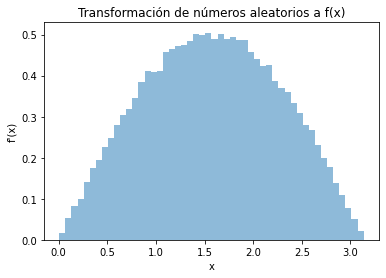

In [34]:
# Histograma normalizado:

n, bins, patches = plt.hist(xt, bins=50, density=True, alpha=0.5) # Capturamos los retornos de hist, y lo fijamos que sea normalizado

print("n:", n) # Esto nos da el valor de cada bin, es decir el valor sobre el eje y. 50 numeros
print("-"*50)
print("bins:", bins) # Esto nos da el valor inferior en x de cada bin. 50 numeros
print("-"*50)
print("patches:", patches) # Esto nos dice que tenemos un array de objetos patches, que podemos modificar...
print("-"*50)

# Calculamos el área del histograma:

Integral = 0.
for i in n:
  Integral+=i*(bins[1]-bins[0])
print("Integral = ", Integral)

# Fijaros que la integral es 1 ahora! 

plt.title("Transformación de números aleatorios a f(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.show()

Patches se puede usar para cambiar los atributos de cada bin, es útil para cambiar el color, y poner algún label diferente. 

Imagina que quieres hacer un histograma y quieres que el lector vea rápidamente que una parte de 'datos' los has excluido en un análisis, por ejemplo... se hace usando la función setp sobre los patches. Veamos:

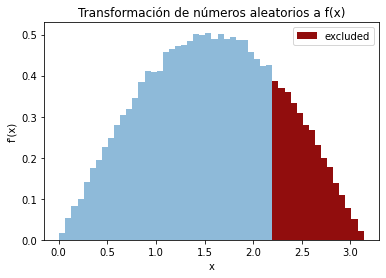

In [35]:
# Histograma normalizado:

n, bins, patches = plt.hist(xt, bins=50, density=True, alpha=0.5) # Capturamos los retornos de hist, y lo fijamos que sea normalizado
plt.setp(patches[35:], 'facecolor', 'darkred') # Pone los últimos 15 bines excluídos
plt.setp(patches[35:], 'alpha', 0.95) # Ponemos los 15 últimos bines menos transparentes
plt.setp(patches[35], 'label', "excluded") # Indicamos que son excluidos para mostrar una leyenda. Solo 1 bin, porque así nos sale sólo 1 indicador en la leyenda...
plt.title("Transformación de números aleatorios a f(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend(loc='best') # Añadimos la leyenda, que muestra claramente los valores excluídos, a modo de ejemplo...
plt.show()